**IFTS 24**
# Ejercicios de Procesamiento Digital de Imágenes.

Profesor: Matías Barreto

Alumna: Gabriela Pari Vaca


# TP 02 Segmentación

**Enunciado**


Dada una imagen con objetos de diferentes colores:

a) Implementar una segmentación para extraer objetos de un color específico usando umbrales en los canales RGB.
b) Calcular y mostrar el histograma de la imagen en escala de grises.

c) Encontrar las coordenadas del rectángulo que encierra el objeto segmentado.

d) Dibujar los bordes del objeto segmentado en color rojo.




## Librerías

In [10]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [11]:
#import skimage as ski
%matplotlib inline


**OpenCV** es una librería especializada en procesamiento de imágenes y visión por computador

**Matplotlib** es una librería de visualización que permite graficar datos y mostrar imágenes.

**Numpy** es una librería para operaciones matemáticas y manipulación de arreglos. En el contexto de imágenes, es muy útil porque OpenCV trata imágenes como arreglos NumPy.

## Funciones auxiliares

In [19]:
def info_imagen(imagen):
    print("Mínimo:", imagen.min())
    print("Máximo:", imagen.max())
    print("Dimensiones de la imagen:", imagen.shape)
    print("Tipo de datos:", imagen.dtype)
    print("Tamaño en memoria BGR(bytes):", imagen.nbytes)


def mostrar_imagen(imagen, titulo, gama='gray',figsize=None):
    plt.figure(figsize=figsize)
    plt.title(titulo)
    plt.imshow(imagen, cmap=gama)
    plt.show()

canales_RGB = {'Rojo': 0, 'Verde': 1, 'Azul': 2}
canales_BGR = {'Azul': 0, 'Verde': 1, 'Rojo': 2}

def obtener_canal(imagen, canal, es_RGB=True):
    if es_RGB:
        return imagen[:, :, canales_RGB[canal]]
    else:
        return imagen[:, :, canales_BGR[canal]]

def mostrar_estadisticas_canal_imagen(imagen, canal):
    print(f"Estadísticas del canal {canal}:")
    print(f"Valor mínimo: {imagen.min()}, Valor máximo: {imagen.max()}, Promedio: {imagen.mean():.2f}")


def obtener_tonos_unicos_imagen(imagen):
    tonos_unicos = np.unique(imagen)  # Obtiene los valores únicos de píxeles
    return

def seleccionar_min_max_color_array(lista):
    pixeles = np.array(lista, dtype=np.uint8)

    # Calcular mínimos y máximos en cada canal
    color_min = np.min(pixeles, axis=0)  # Mínimos en cada canal RGB
    color_max = np.max(pixeles, axis=0)  # Máximos en cada canal RGB
    print(f"Rango mínimo: {color_min}")
    print(f"Rango máximo: {color_max}")
    return np.array([color_min], dtype=np.uint8), np.array([color_max], dtype=np.uint8)

def comparar_imagenes_grilla(img_original,img1, img2, titulo_img1, titulo_img2, titulo_img_original="Imagen original"):
    # Mostrar imagen segmentada
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(img_original)
    axes[0].set_title(titulo_img_original)
    axes[0].axis("off")

    axes[1].imshow(img1, cmap="gray")
    axes[1].set_title(titulo_img1)
    axes[1].axis("off")

    axes[2].imshow(img2)
    axes[2].set_title(titulo_img2)
    axes[2].axis("off")
    plt.tight_layout()
    plt.show()

def comparar_histograma_rgb(img, titulo):
    canales = ('Rojo', 'Verde', 'Azul')
    colores = ('red', 'green', 'blue')
    for i, color in enumerate(colores):
        hist = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(hist, color=color, label=canales[i])

    plt.title("Histograma de cada canal RGB")
    plt.xlabel("Valor de intensidad")
    plt.ylabel("Número de píxeles")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

def hist(img):
    h = np.zeros(256)           # Vector para contar ocurrencias
    for i in range(img.shape[0]):    # Para cada fila
        for j in range(img.shape[1]): # Para cada columna
            h[img[i,j]] += 1         # Incrementa contador del valor
    return h

def mostrar_histograma(img, tipo_transformacion):
    # Histograma imagen muestreada
    plt.figure(figsize=(4, 4))
    plt.plot(hist(img))
    Ny, My = img.shape
    plt.title(f'Histograma - Imagen {tipo_transformacion}\nResolución: {Ny}x{My} pixels')
    plt.xlabel('Nivel de gris')
    plt.ylabel('Número de pixels')
    plt.grid(True, alpha=0.3)
    plt.show()



Selección de imagen

Seleccione una imagen de la siguiente página https://en.wikipedia.org/wiki/List_of_Indian_spices


In [13]:
!wget https://upload.wikimedia.org/wikipedia/commons/8/82/Common_Indian_spices.jpg -O especias-coloridas.jpg

--2025-06-23 23:22:59--  https://upload.wikimedia.org/wikipedia/commons/8/82/Common_Indian_spices.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203207 (3.1M) [image/jpeg]
Saving to: ‘especias-coloridas.jpg’

especias-coloridas. 100%[===================>]   3.05M  13.2MB/s    in 0.2s    

2025-06-23 23:22:59 (13.2 MB/s) - ‘especias-coloridas.jpg’ saved [3203207/3203207]



## Mostrar imagen

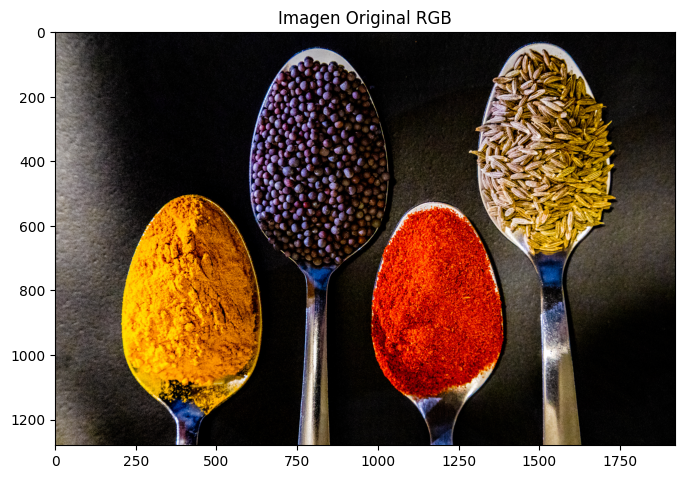

Mínimo: 0
Máximo: 255
Dimensiones de la imagen: (1280, 1920, 3)
Tipo de datos: uint8
Tamaño en memoria BGR(bytes): 7372800


In [14]:
imagen_especias = cv2.imread('especias-coloridas.jpg')
imagen_especias = cv2.cvtColor(imagen_especias, cv2.COLOR_BGR2RGB)

mostrar_imagen(imagen_especias, 'Imagen Original RGB', figsize=(8,8))
info_imagen(imagen_especias)

La imagen es de cuatro cucharas de condimentos que posee colores diferentes. Algo a tener en cuenta son las texturas que tiene la imagen y las sombras que generan, más adelante se podrá ver como influyen en el análisis.

## Separación de canales RGB

Voy a mostrar la imagen en los distintos canales RGB. En cada uno se podrá ver la intensidad del color en cada canal.


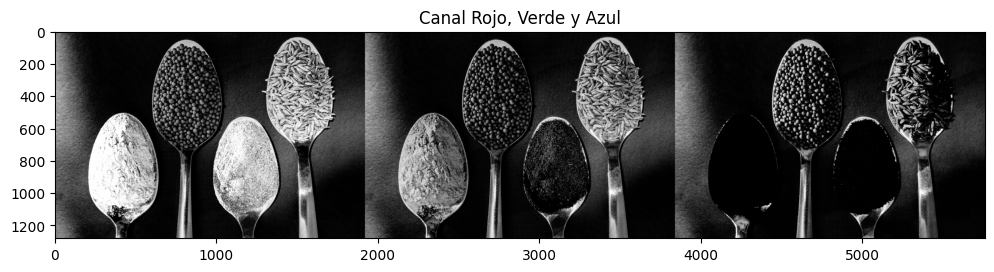

In [15]:
canal_rojo = obtener_canal(imagen_especias, "Rojo")
canal_verde = obtener_canal(imagen_especias, "Verde")
canal_azul = obtener_canal(imagen_especias, "Azul")

todas = np.hstack((canal_rojo, canal_verde, canal_azul))
mostrar_imagen(todas, "Canal Rojo, Verde y Azul", figsize=(12,8))



En el canal rojo podemos ver que de los cuatro objetos, dos poseen una alta intensidad del color y hay un tercero que parcialmente tiene una claridad, esto puede indicar que tienen una mayor concentración de rojo en la composición de su tono, pudiendo o no reflejarse en una intensidad de color rojo. Esto difiere del canal azul que posee más zonas de baja intensidad, el hecho que posea dos de los objetos con mayor oscuridad, indica que dentro de su composición de color poseen poca o nula tonalidad azul.

El gráfico del canal verde posee zonas con intensidad de color, si bien este no se percibe en la foto original, puede indicar que ayuda a la formación de otro color.

## Histograma de los canales RGB

Veamos el histograma de cada canal.


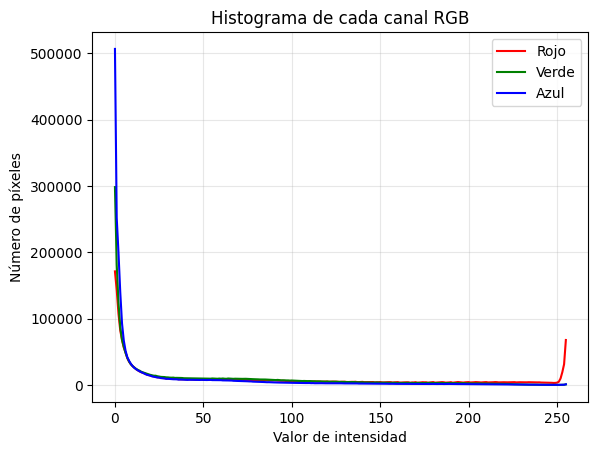

In [16]:
comparar_histograma_rgb(imagen_especias, "Histograma de cada canal RGB")



La imagen seleccionada posee muchos valores con poca intensidad en varios canales, el que resalta con alta intensidad es el canal rojo


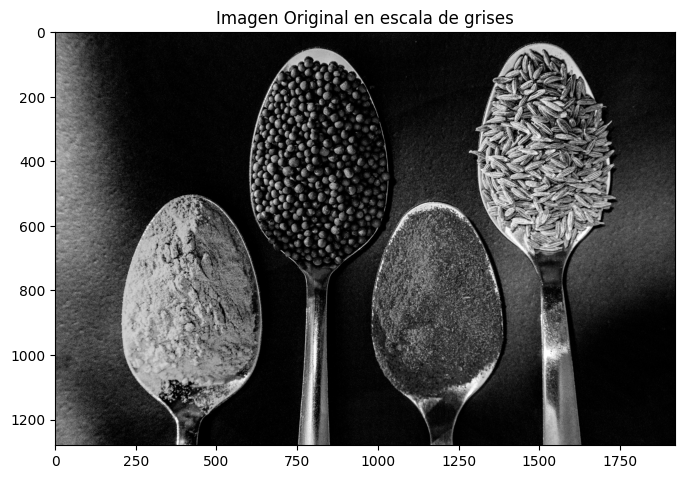

In [17]:
imagen_especias_gris = cv2.cvtColor(imagen_especias, cv2.COLOR_RGB2GRAY)
mostrar_imagen(imagen_especias_gris, 'Imagen Original en escala de grises', figsize=(8,8))



Vemos el histograma de la imagen en escala de grises


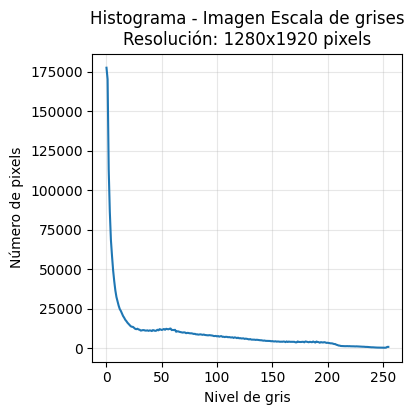

In [20]:
mostrar_histograma(imagen_especias_gris, "Escala de grises")



Del grafico podemos ver que mucho de los valores se centran en la poca intensidad, esto se refleja en la imagen porque hay muchas areas oscuras.

## Recorte imagen

Para el ejercicio voy a trabajar en separar este objeto


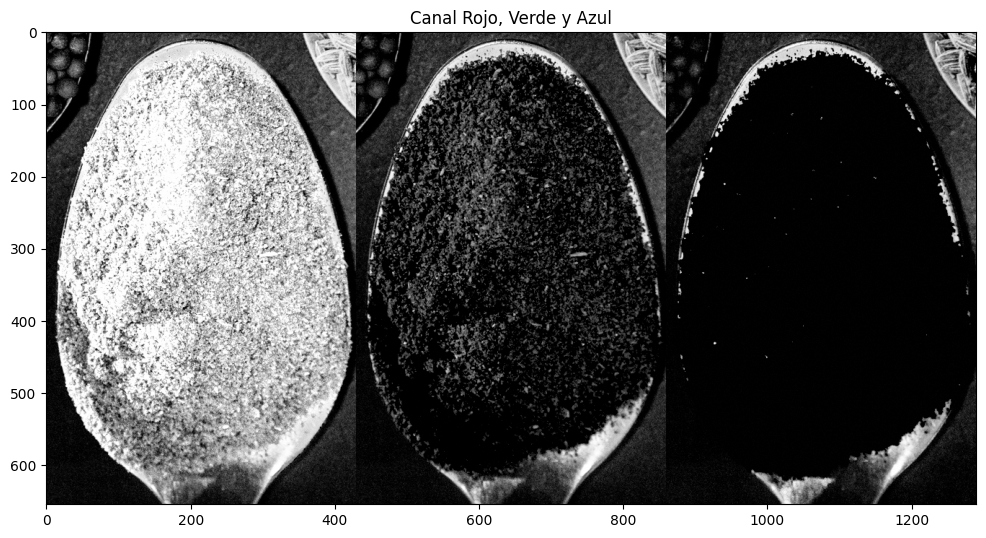

In [21]:
# Primero alto, despues ancho
imagen_especias_cropped = imagen_especias[515:1170, 965:1395]

canal_rojo_cropped = obtener_canal(imagen_especias_cropped, "Rojo")
canal_verde_cropped = obtener_canal(imagen_especias_cropped, "Verde")
canal_azul_cropped = obtener_canal(imagen_especias_cropped, "Azul")

todas = np.hstack((canal_rojo_cropped, canal_verde_cropped, canal_azul_cropped))
mostrar_imagen(todas, "Canal Rojo, Verde y Azul", figsize=(12,8))




## Histogramas del recorte


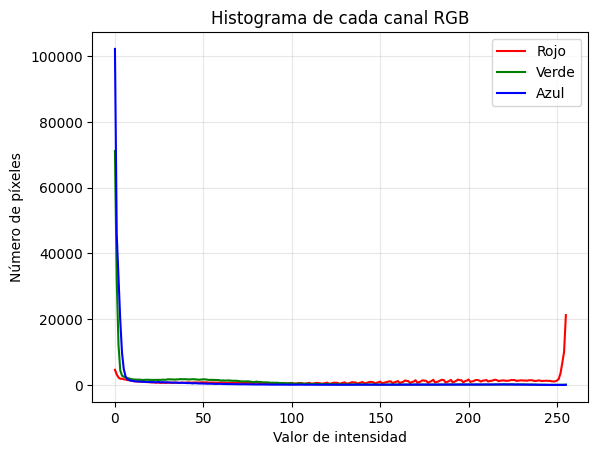

In [22]:
comparar_histograma_rgb(imagen_especias_cropped, "Histograma de cada canal RGB del recorte")



Luego de recortar la imagen se puede ver que que el rojo tiene mayor predominancia y se puede ver algunas intensidades intermedias.

Vamos a ver el histograma de la imagen transformada a escala de grises


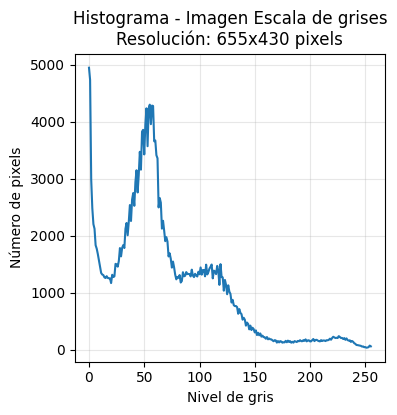

In [23]:
imagen_especias_cropped_gris = cv2.cvtColor(imagen_especias_cropped, cv2.COLOR_RGB2GRAY)
mostrar_histograma(imagen_especias_cropped_gris, "Escala de grises")

Se puede ver que hay mas variaciones de intensidad

## Selección de pixeles

Voy a seleccionar pixeles para poder seguir con la segmentación. Elijo varios para luego buscar el mínimo y máximo y continuar con el análisis


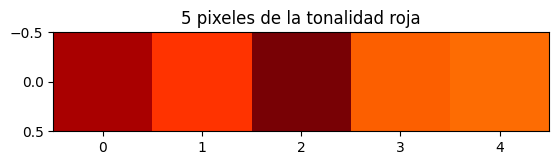

In [24]:
pixel_rojo_1 = imagen_especias_cropped[100, 200]
pixel_rojo_2 = imagen_especias_cropped[200, 200]
pixel_rojo_3 = imagen_especias_cropped[550, 150]
pixel_rojo_4 = imagen_especias_cropped[150, 150]
pixel_rojo_5 = imagen_especias_cropped[200, 180]

lista_pixeles = [pixel_rojo_1, pixel_rojo_2, pixel_rojo_3, pixel_rojo_4, pixel_rojo_5]

todas = np.vstack((lista_pixeles))

pixel_rojo_1_array = np.array([todas], dtype=np.uint8)

mostrar_imagen(pixel_rojo_1_array, "5 pixeles de la tonalidad roja") #veo el pixel elegido



De todos los pixeles vamos a utilizar la función "seleccionar_min_max_color_array" para encontrar los extremos


In [25]:
pixel_rojo_min, pixel_rojo_max = seleccionar_min_max_color_array(lista_pixeles)

Rango mínimo: [120   0   0]
Rango máximo: [255 108   5]



Segmentación

Creamos la mascara para poder segmentar por color


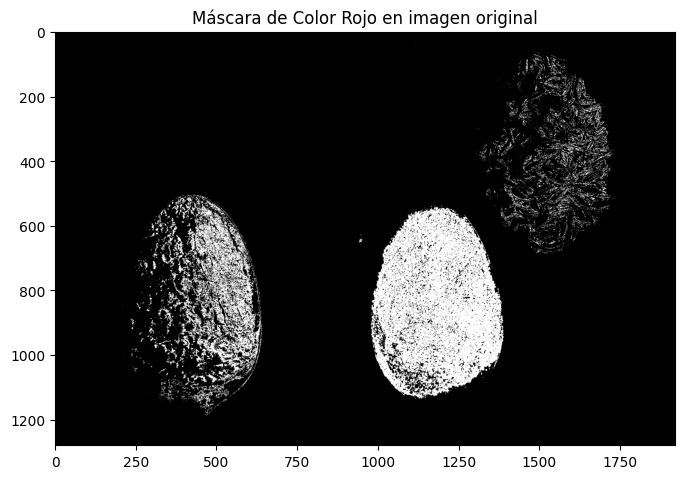

In [26]:
mascara = cv2.inRange(imagen_especias, pixel_rojo_min, pixel_rojo_max)
mostrar_imagen(mascara, "Máscara de Color Rojo en imagen original", figsize=(8,8))

Comparamos con la imagen original, le aplicamos la mascara y segmentamos.

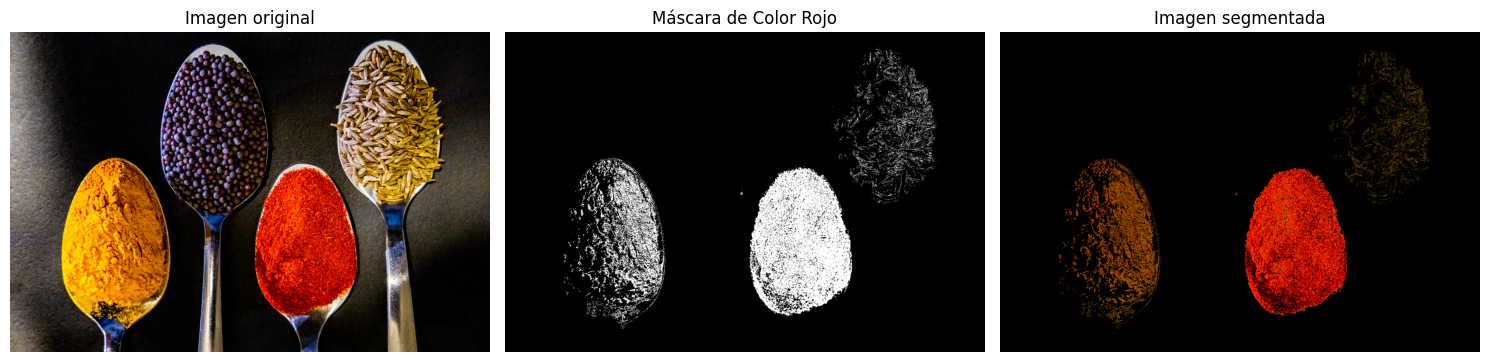

In [27]:
resultado_segmentacion = cv2.bitwise_and(imagen_especias, imagen_especias, mask=mascara)

comparar_imagenes_grilla(imagen_especias, mascara, resultado_segmentacion, "Máscara de Color Rojo", "Imagen segmentada")


## Desenfoque de imagen

Voy a probar con la técnica de difusión mediante el desenfoque Gaussiano. Esto me sirve para eliminar ruido y suavizar la imagen antes de la segmentación, también suaviza bordes antes de detectar contornos.



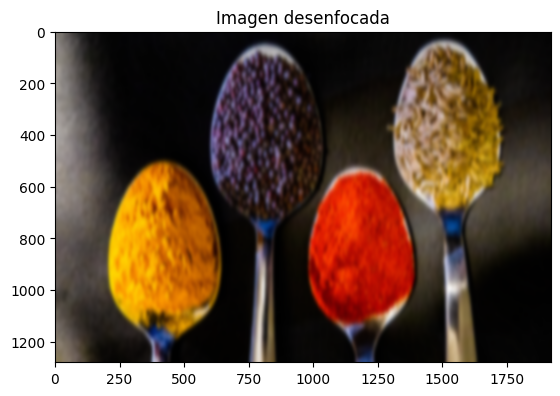

In [28]:
imagen_especias_blur = cv2.GaussianBlur(imagen_especias, (35, 65), 0)
mostrar_imagen(imagen_especias_blur, "Imagen desenfocada")


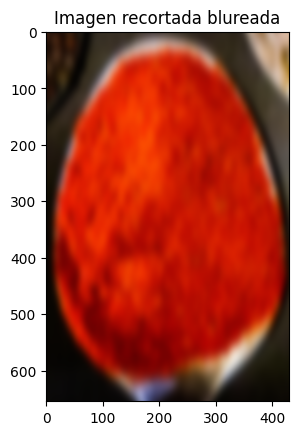

In [29]:
img_cropped_blur = imagen_especias_blur[515:1170, 965:1395]
mostrar_imagen(img_cropped_blur, "Imagen recortada blureada")


## Selección de pixeles

Se seleccionan píxeles de la imagen para encontrar las distintas tonalidades de color que posee el recorte.



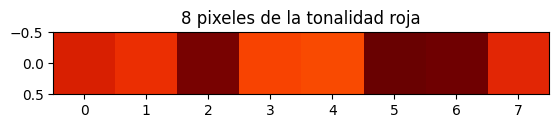

In [30]:
img_cropped = imagen_especias_blur[515:1170, 965:1395]

ubicacion_pixeles = [(100, 200), (340, 110), (550, 150), (150, 150), (200, 180), (580, 152), (570, 150), (427, 72)]

# Extraer los valores de los píxeles en una sola línea
lista_pixeles = [img_cropped[y, x] for y, x in ubicacion_pixeles]


todas = np.vstack((lista_pixeles))
barra_pixel_rojo = np.array([todas], dtype=np.uint8)

mostrar_imagen(barra_pixel_rojo, f"{len(lista_pixeles)} pixeles de la tonalidad roja") #veo el pixel elegido

In [31]:
pixel_rojo_min_array, pixel_rojo_max_array = seleccionar_min_max_color_array(lista_pixeles)
#pixel_rojo_max_array = np.array([[249,30,3]], dtype=np.uint8)

Rango mínimo: [105   0   1]
Rango máximo: [249  74   5]


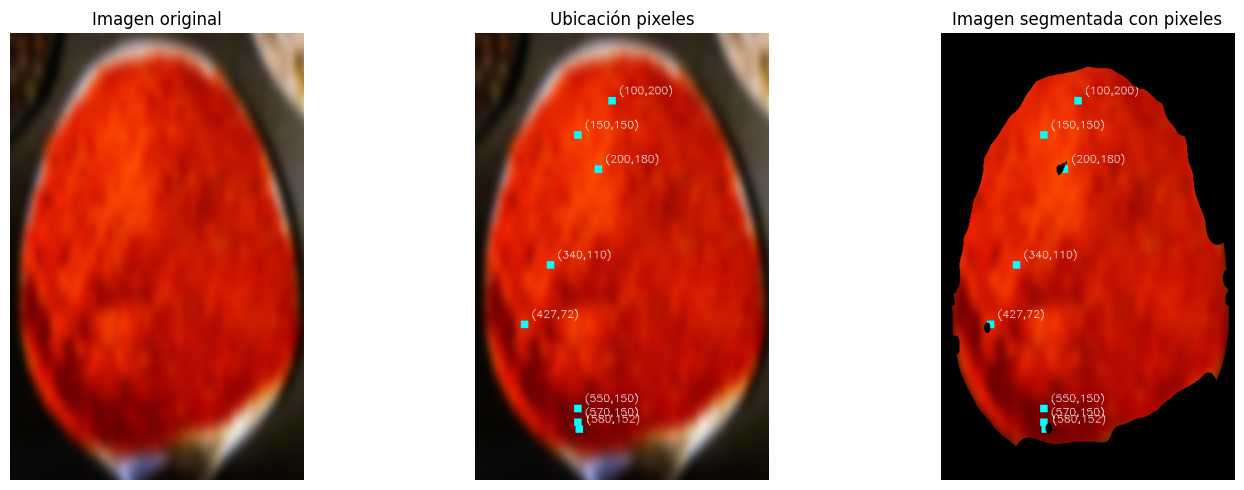

In [32]:
img_cropped_blur_pixeles = img_cropped_blur.copy()
mascara_img_cropped_blur = cv2.inRange(img_cropped_blur, pixel_rojo_min_array, pixel_rojo_max_array)

for y, x in ubicacion_pixeles:
    cv2.rectangle(img_cropped_blur_pixeles, (x-5, y-5), (x+5, y+5), (0, 255, 255), -1)
for y, x in ubicacion_pixeles:
    cv2.putText(img_cropped_blur_pixeles, f"({y},{x})", (x+10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

#mostrar_imagen(img_cropped_blur_pixeles, "Ubicación de los píxeles")
resultado_blur_cropped = cv2.bitwise_and(img_cropped_blur_pixeles, img_cropped_blur_pixeles, mask=mascara_img_cropped_blur)

#mostrar_imagen(resultado_blur_cropped, "Ubicación de los píxeles")
comparar_imagenes_grilla(img_cropped_blur, img_cropped_blur_pixeles, resultado_blur_cropped, "Ubicación pixeles", "Imagen segmentada con pixeles")

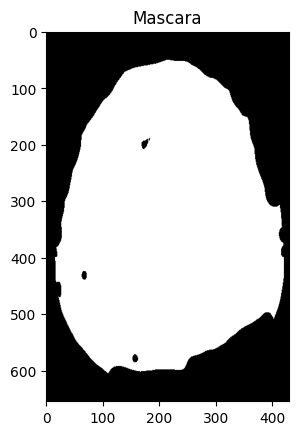

In [33]:
#img_cropped_blur
mascara_img_cropped_blur = cv2.inRange(img_cropped_blur, pixel_rojo_min_array, pixel_rojo_max_array)

mostrar_imagen(mascara_img_cropped_blur, "Mascara")

## Probando con pocos pixeles

Al principio seleccionaba solamente tres pixeles y me pasaba que no completaba la segmentación. Por eso decidí agregar más pixeles.


Rango mínimo: [120   1   0]
Rango máximo: [255  51   5]


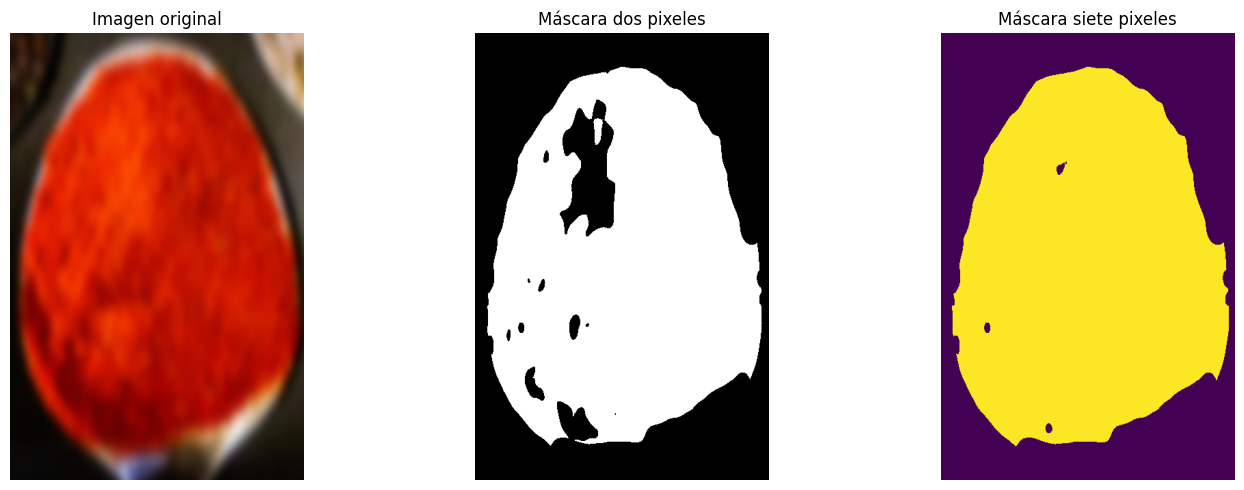

In [34]:
pixel_rojo_min_array_v2, pixel_rojo_max_array_v2 = seleccionar_min_max_color_array([pixel_rojo_3, pixel_rojo_2])
mascara_blur_v2_crop = cv2.inRange(img_cropped_blur, pixel_rojo_min_array_v2, pixel_rojo_max_array_v2)

comparar_imagenes_grilla(
    img_cropped_blur,
    mascara_blur_v2_crop,
    mascara_img_cropped_blur,
    "Máscara dos pixeles",
    "Máscara siete pixeles")




## Imagen segmentada

Luego de obtener un mejor resultado en la aplicación de la mascara, veamos como queda la imagen



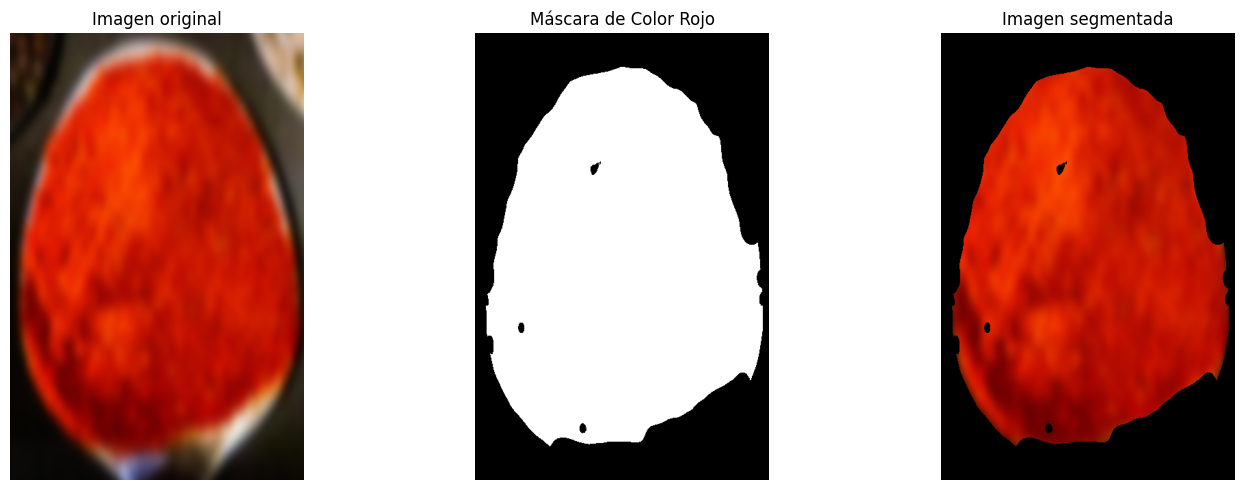

In [35]:
resultado_blur_cropped = cv2.bitwise_and(img_cropped_blur, img_cropped_blur, mask=mascara_img_cropped_blur)

comparar_imagenes_grilla(img_cropped_blur, mascara_img_cropped_blur, resultado_blur_cropped, "Máscara de Color Rojo", "Imagen segmentada")


## Segmentar la imagen completa


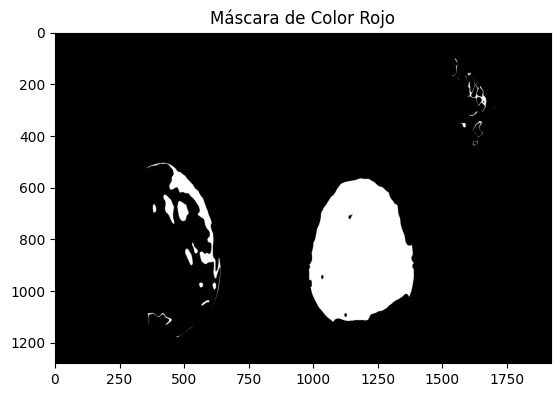

In [36]:
mascara_img_blur = cv2.inRange(imagen_especias_blur, pixel_rojo_min_array, pixel_rojo_max_array)
mostrar_imagen(mascara_img_blur, "Máscara de Color Rojo")


Segmentación en imagen con desenfoque


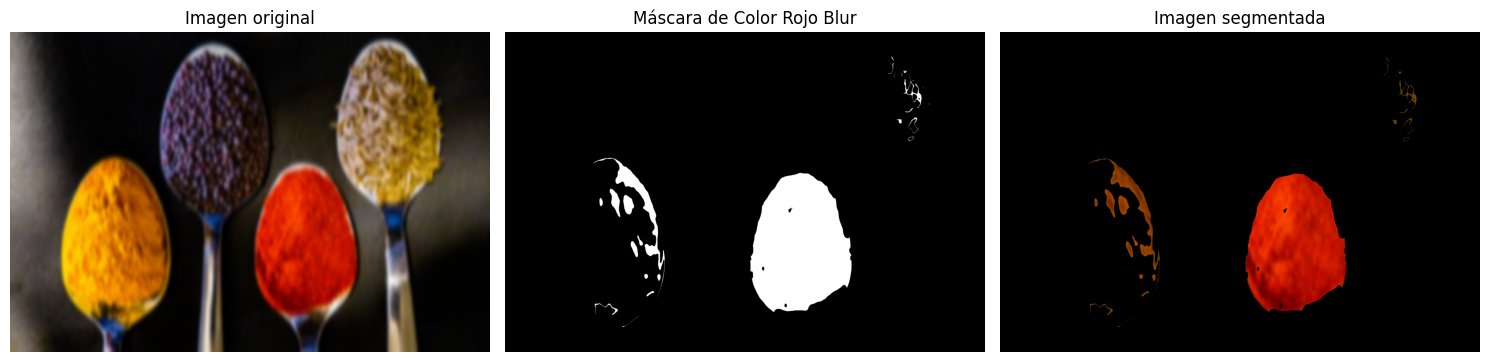

In [37]:
resultado_blur = cv2.bitwise_and(imagen_especias_blur, imagen_especias_blur, mask=mascara_img_blur)

comparar_imagenes_grilla(imagen_especias_blur, mascara_img_blur, resultado_blur, "Máscara de Color Rojo Blur", "Imagen segmentada")

## Segmentación en imagen original



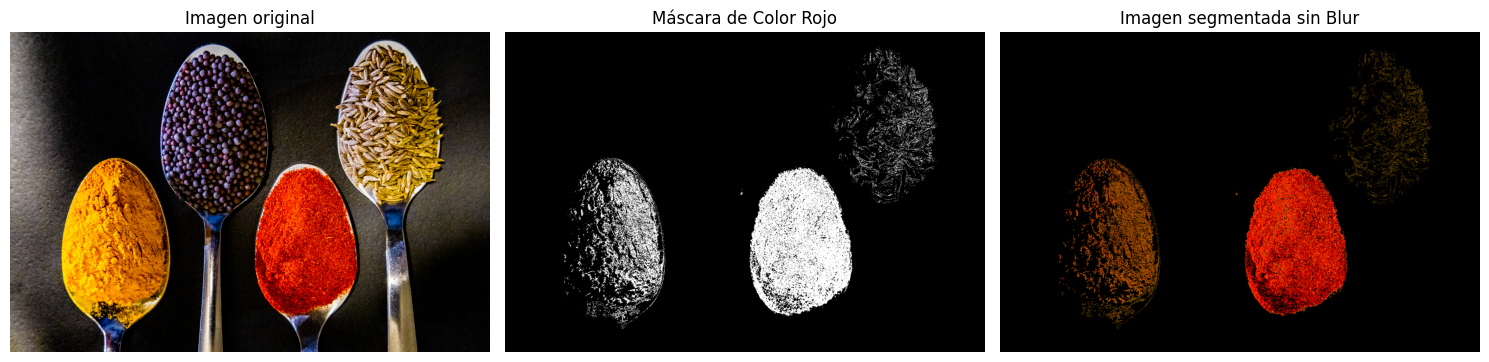

In [38]:
comparar_imagenes_grilla(imagen_especias, mascara, resultado_segmentacion, "Máscara de Color Rojo", "Imagen segmentada sin Blur")


## Comparación

Luego de realizar el blureado a la imagen original como resultado obtuve una mejor separación del color. Aún quedan rastros en en otros objetos, esto se puede deber a que poseen valores del canal rojo en su composición. Aún así se puede apreciar la diferencia entre las dos segmentaciones, el color de la segmentación es más sólido a diferencia de la original que al tener textura se refleja en las tonalidades.



Morphological Operations

Para mejorar la segmentación se necesita eliminar aquellos pixeles que no corresponden al elemento que se desea separar. En este caso el objeto de la cuchara con el condimento amarillo, posee ciertos tonos del rojo que se marcan en la segmentación.

La técnica de filtrar ruido con operaciones morfológicas, elimina el ruido de algunos pixeles. Existen muchos usos para esta libreria

morphologyEx de Python OpenCV es una técnica de procesamiento de imágenes que trabajan con la forma de los objetos en una imagen. Esta estrategia de procesamiento generalmente se aplica a imágenes binarias.

Las operaciones morfológicas en OpenCV incluyen:

Erosion, Dilation, Opening, Closing, Morphological, Gradient, Top hat, Black hat

Para todas estas técnicas, los dos requisitos fundamentales son: Una imagen binaria y un elemento estructurante (kernel) que se desliza sobre la imagen para aplicar la transformación.



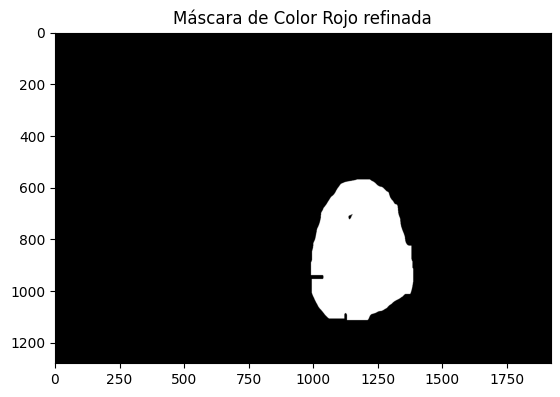

In [39]:
kernel = np.ones((13, 13), np.uint8)  # Tamaño del filtro
mascara_img_blur_morf = cv2.morphologyEx(mascara_img_blur, cv2.MORPH_OPEN, kernel, iterations=4)
mostrar_imagen(mascara_img_blur_morf, "Máscara de Color Rojo refinada")




Se elimino que aparezca otro objeto, ahora vamos a rellenar un poco algunos espacios


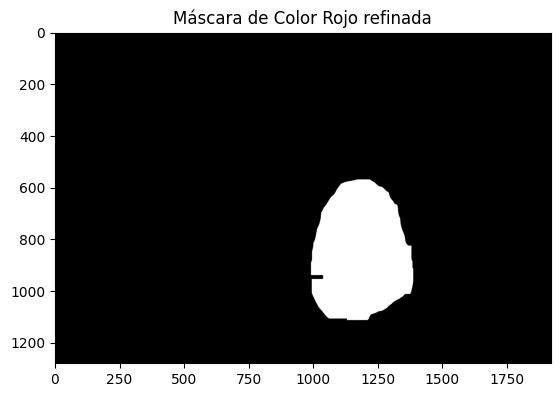

In [40]:
mascara_refinada = cv2.morphologyEx(mascara_img_blur_morf, cv2.MORPH_CLOSE, kernel)
mostrar_imagen(mascara_refinada, "Máscara de Color Rojo refinada")



## Rectangulo

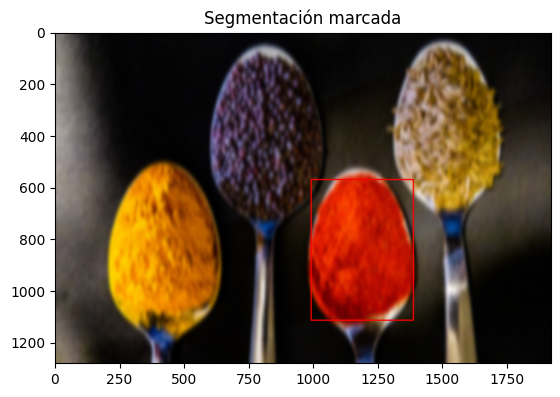

In [41]:
# Obtener contornos de la máscara
contornos, _ = cv2.findContours(mascara_refinada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Creo copia para no modigicar la imagen original
imagen_especias_blur_rectangulo = imagen_especias_blur.copy()
# Dibujar el rectángulo si se encontró algún objeto segmentado
for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno)  # Coordenadas del rectángulo
    cv2.rectangle(imagen_especias_blur_rectangulo, (x, y), (x + w, y + h), (255, 0, 0), 3)  # Azul en BGR

# Mostrar la imagen con la segmentación marcada
mostrar_imagen(imagen_especias_blur_rectangulo, "Segmentación marcada")

## Contorno

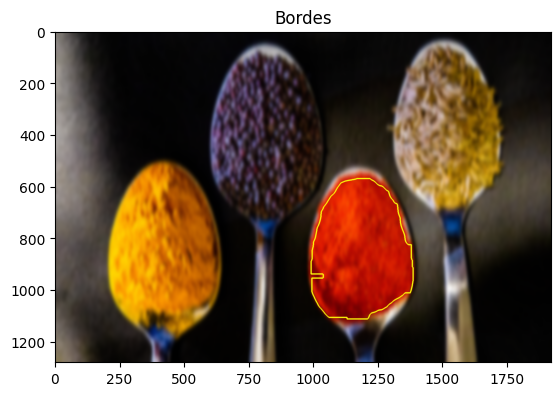

In [42]:
# Paso 1: encontrar los contornos en la máscara
contornos, _ = cv2.findContours(mascara_refinada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Paso 2: copiar la imagen original para no modificarla
imagen_especias_blur_bordes = imagen_especias_blur.copy()  # Asegurate de que esté en RGB

# Paso 3: dibujar los contornos sobre la imagen
cv2.drawContours(imagen_especias_blur_bordes, contornos, -1, color=(255, 255, 10), thickness=4)  # rojo
mostrar_imagen(imagen_especias_blur_bordes, "Bordes")



El borde lo cambie a color mas claro para que se note del rojo que es el objeto

## Conclusión

Luego de realizar el ejercicio integrador pude ver manipular distintas imagenes y modificarlas mediante librerias, la mayoria de Open CV. Esto me permitio entender los conceptos del color que no había visto antes. Me parecio interesante la parte de segmentar porque pensaba que el filtrar por un color sería mas fácil, usando pocos parametros, pero viendo como es que se componen los colores vi que hay muchas cosas que no se ven al ojo humano como la composición de un color los algoritmos lo pueden detectar. Estas herramientas poseen varias trabas en el momento de trabajar pero requieren mayor entendimiento sobre su comportamiento, y como hay varias librerias que ayudan, tales como en la segmentación ayudaron el blureado y también las operaciones morfológicas. Seguramente existen otras herramientas que con clic te permiten realizar este trabajo pero es interasante ver como funcionan las cosas por detrás para poder elaborar en un futuro algoritmos de IA en el área de imágenes.
